Here we will elicit the parameters of a [Gamma ratio distribution](https://www.jstor.org/stable/25664553) using the [method of moments](https://en.wikipedia.org/wiki/Method_of_moments_(statistics)).
The idea is to elicit the four parameters of the distribution to attain a certain mean, variance (standard deviation) and median.

In [10]:
#### Script to elicit the (four) parameter of a Gamma ratio given the mean and the probability
devtools::source_url("https://raw.githubusercontent.com/maxbiostat/CODE/master/R/DISTRIBUTIONS/gamma_ratio.R")
GR.mean <- function(k1, k2, t1, t2){
  (k1*t1)/(t2*(k2 - 1))
}
GR.sd <- function(k1, k2, t1, t2){
  sqrt(
    (t1/t2)^2 *((k1 + k2 -1)*k1)/((k2-2)*(k2-1)^2)
  )
}
qgamma.ratio <- function(p, k1, k2, t1, t2, N){
  opt.df <- function(x){
    p.hat <- integrate(function(y) dgamma.ratio(y, k1, t1, k2, t2, N), 0, x)$value
    return(abs(p-p.hat))
  }
  Opt <- optimise(f = opt.df, lower = 0, upper = 1E3)
  return(Opt$minimum)
}
lossR0 <- function(pars, N, Mean, Median, Var){
  a1 <- pars[1]
  a2 <- pars[2]
  b1 <- pars[3]
  b2 <- pars[4]
  m <- GR.mean(k1 = a1, k2 = a2, t1 = b1*N, t2 = b2)
  M.err <- sqrt((m-Mean)^2)
  md <- qgamma.ratio(.5, k1 = a1, k2 = a2, t1 = b1, t2 = b2, N = 1)
  MD.err <- sqrt((md-Median)^2)
  s <- GR.sd(k1 = a1, k2 = a2, t1 = b1*N, t2 = b2)
  S.err <- sqrt((s-sqrt(Var))^2)
#     return(M.err + MD.err + S.err)
    return(.5*M.err + .25*MD.err + .25*S.err)
}


SHA-1 hash of file is 386fc2fe8dc2168b851d8b4eeabc004a84aafe45


In [12]:
Nn <- 1
Opt <- optim(par = c(.1, 2.5, .1, .1), lossR0, lower = c(0, 2, 0, 0),
      method = "L-BFGS-B", Mean = 3, Median = 1, Var = 2^2, N = Nn) 
Opt.par <- Opt$par
names(Opt.par) <- c("k_1", "k_2", "theta_1", "theta_2")

In [13]:
Opt.par

k_1      k_2  theta_1  theta_2 
4.127477 3.888340 4.809125 3.119538

In [14]:
GR.mean(k1 = as.numeric(Opt.par[1]), k2 = as.numeric(Opt.par[2]), t1 = as.numeric(Opt.par[3]) * Nn, t2 = as.numeric(Opt.par[4])) ## mean

[1] 2.202988

In [15]:
qgamma.ratio(.5, k1 = Opt.par[1], k2 = Opt.par[2], t1 = Opt.par[3], t2 = Opt.par[4], N =  Nn) ## median

[1] 1.057062

In [16]:
GR.sd(k1 = as.numeric(Opt.par[1]), k2 = as.numeric(Opt.par[2]), t1 = as.numeric(Opt.par[3]) * Nn, t2 = as.numeric(Opt.par[4])) ## standard deviation

[1] 2.090108

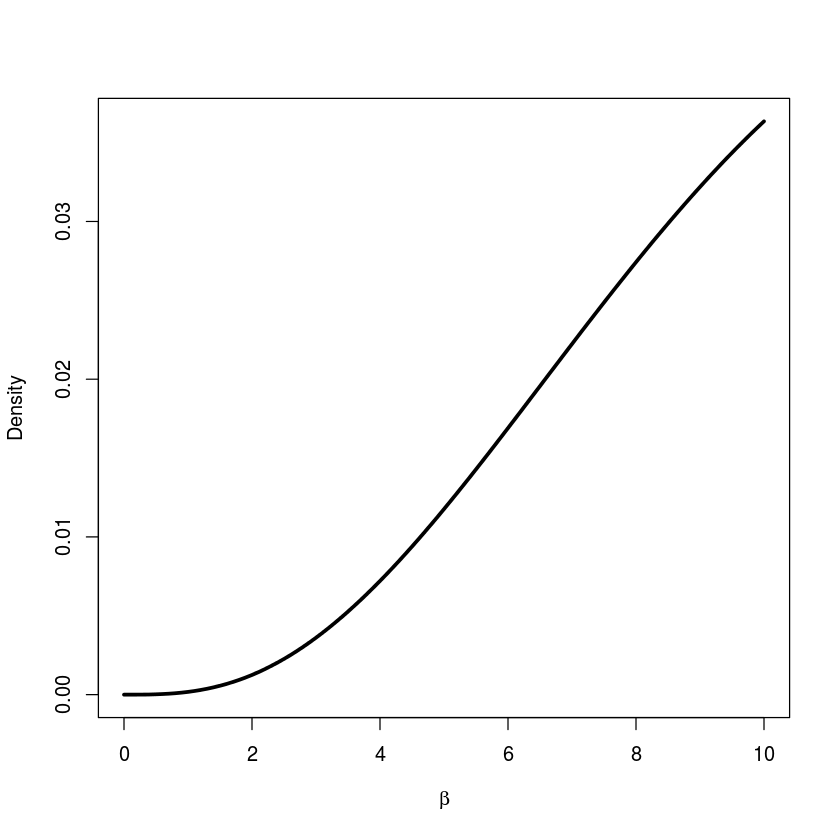

In [17]:
curve(dgamma(x, shape = Opt.par[1], scale = Opt.par[3]), lwd = 3, 0, 10,
      xlab = expression(beta), ylab = "Density")

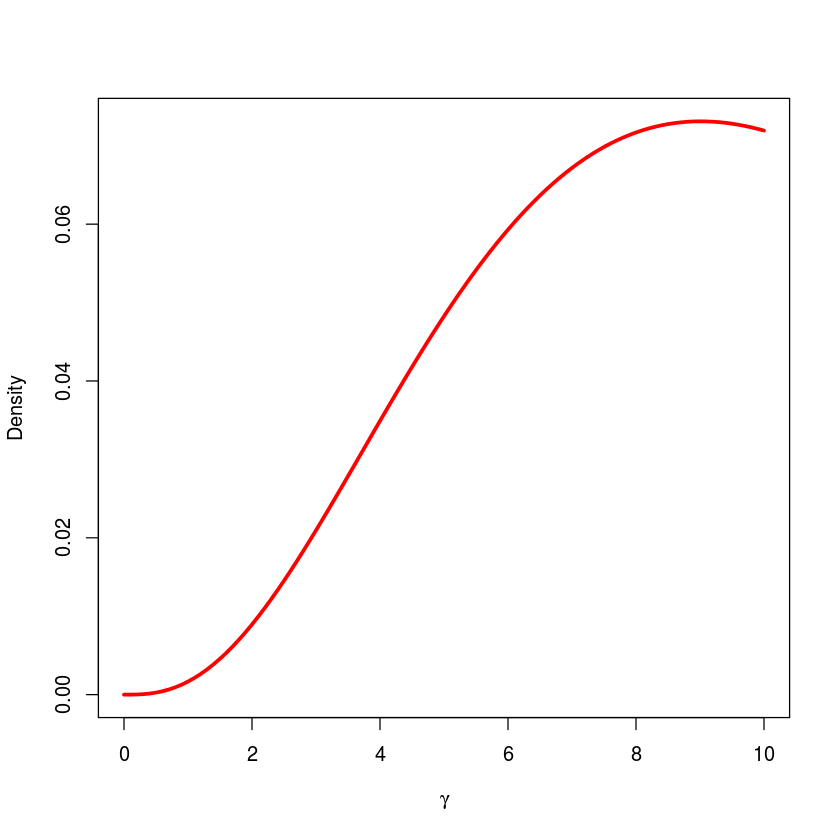

In [18]:
curve(dgamma(x, shape = Opt.par[2], scale = Opt.par[4]), lwd = 3, 0, 10,
      xlab = expression(gamma), ylab = "Density" , col = 2)

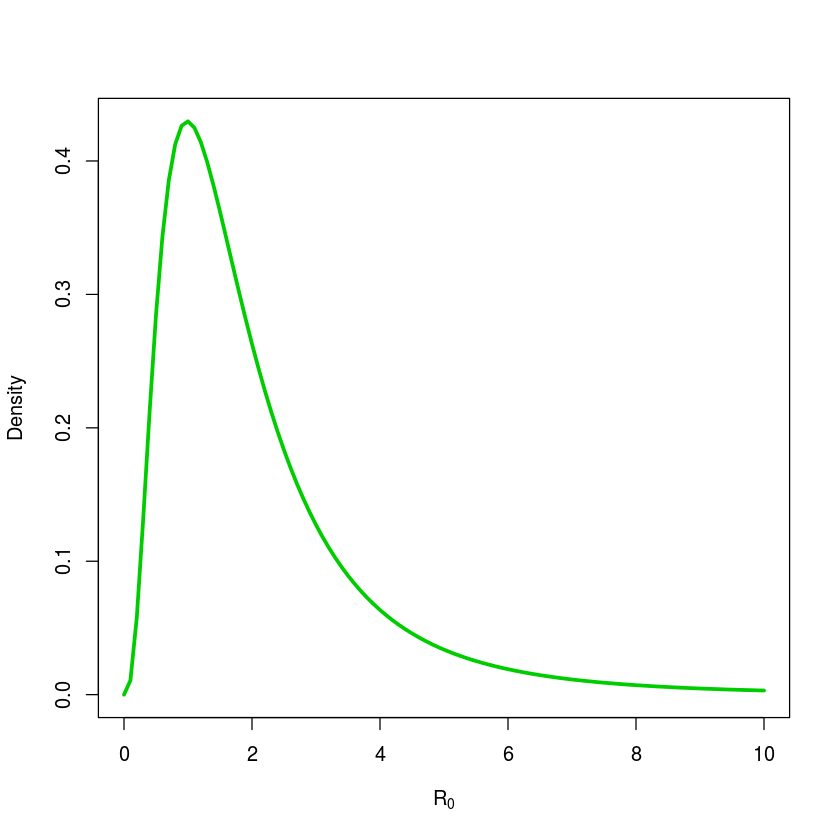

In [19]:
curve(dgamma.ratio(x, k1 = Opt.par[1], k2 = Opt.par[2], t1 = Opt.par[3], t2 = Opt.par[4], N = Nn), lwd = 3, 0, 10,
      xlab = expression(R[0]), ylab = "Density", col = 3)